In [1]:
import sys, os, cv2
import numpy as np
module_rootdir = '../../..'
dataset_rootdir = '../../../..'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.kitti_dataset_utils.kitti_remap_utils import load_all_sequence_groundtruths_json
from modules.augmentation.lib.mixup_transform import mixup
from modules.augmentation.lib.geometric_transform import resize_with_warping
from modules.plot.viz_annotation import draw_bbox_on_img_data

In [2]:
selected_labels, _, _ = load_all_sequence_groundtruths_json(
    config_dataset.kitti_all_sequences_folders, 
    config_dataset.kitti_remapped_label_file_path, 
    label_rootdir, 
    dataset_rootdir)

random_idx = np.arange(len(selected_labels))
np.random.shuffle(random_idx)
selected_labels = [selected_labels[idx] for idx in random_idx]

Loading JSON file .. please wait
Sequence: 0000
Sequence: 0001
Sequence: 0002
Sequence: 0003
Sequence: 0004
Sequence: 0005
Sequence: 0006
Sequence: 0007
Sequence: 0008
Sequence: 0009
Sequence: 0010
Sequence: 0011
Sequence: 0012
Sequence: 0013
Sequence: 0014
Sequence: 0015
Sequence: 0016
Sequence: 0017
Sequence: 0018
Sequence: 0019
Sequence: 0020


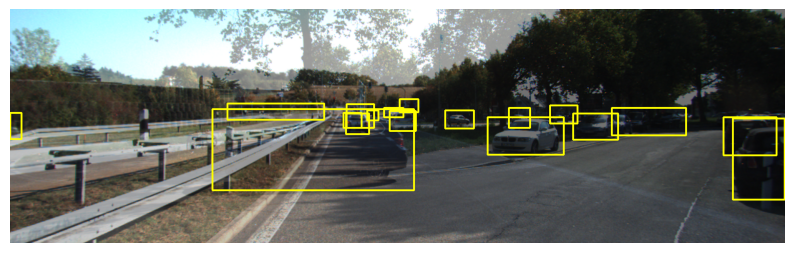

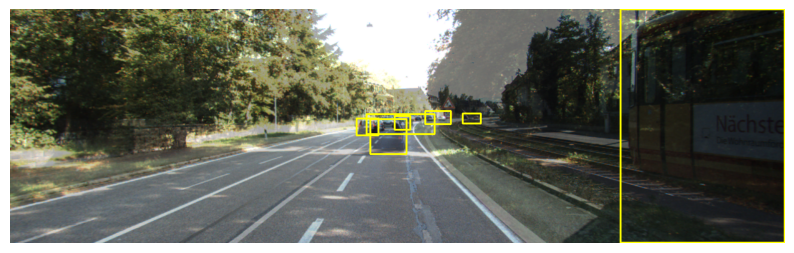

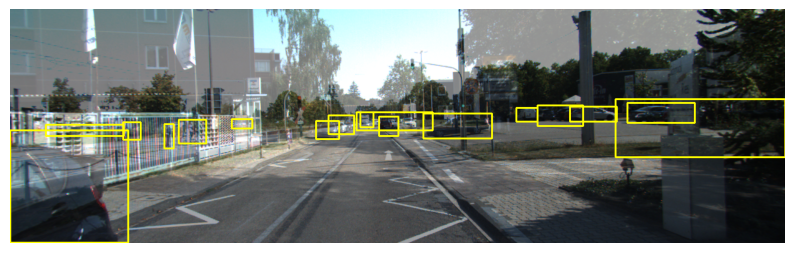

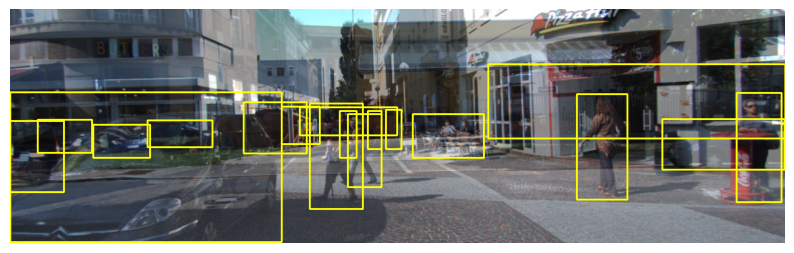

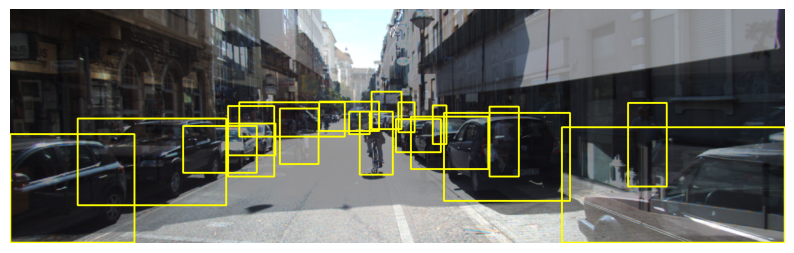

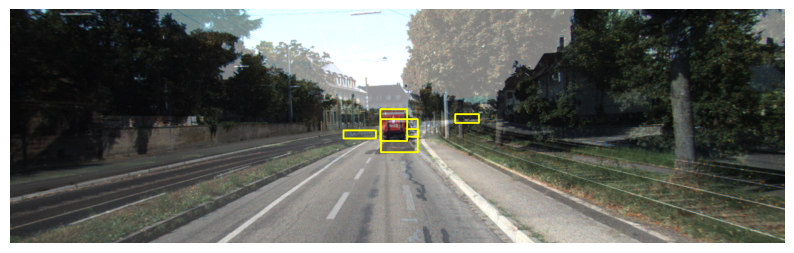

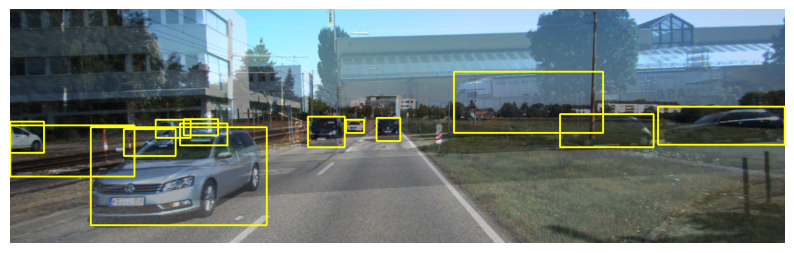

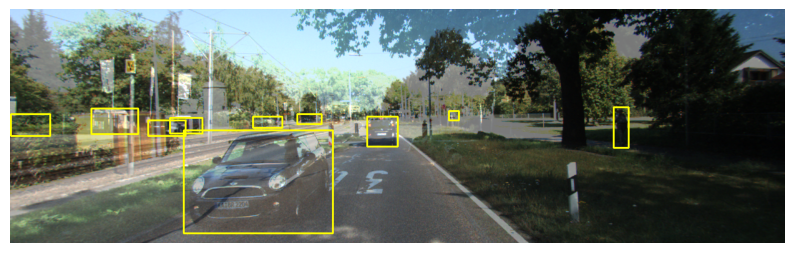

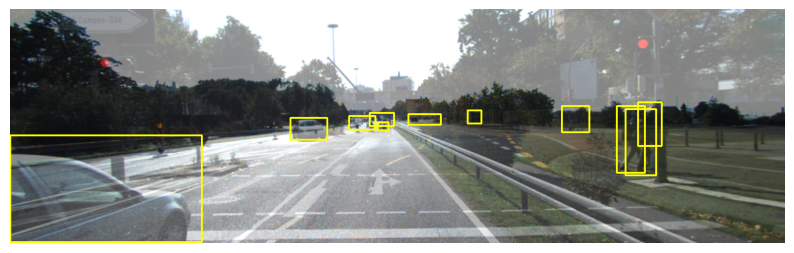

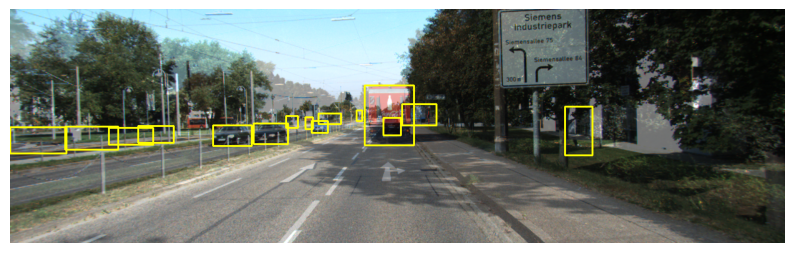

In [3]:
mixup_obj = mixup(alpha=32.0, beta=32.0)

for i in range(10):

    idx1 = 2*i
    idx2 = 2*i + 1

    img_path1 = selected_labels[idx1]['image_path']
    img_path2 = selected_labels[idx2]['image_path']

    objCategoryid1 = selected_labels[idx1]['classid']
    objCategoryid2 = selected_labels[idx2]['classid']

    boundingBox2D1 = selected_labels[idx1]['bbox']
    boundingBox2D2 = selected_labels[idx2]['bbox']

    image_rgb1 = cv2.cvtColor(cv2.imread(img_path1), cv2.COLOR_BGR2RGB)
    image_rgb2 = cv2.cvtColor(cv2.imread(img_path2), cv2.COLOR_BGR2RGB)

    image_rgb1, boundingBox2D1 = resize_with_warping(image_rgb1, boundingBox2D1, 375, 1242) 
    image_rgb2, boundingBox2D2 = resize_with_warping(image_rgb2, boundingBox2D2, 375, 1242) 

    new_img, bboxes, classlabels = mixup_obj.create_mixup(
        image1=image_rgb1, 
        image2=image_rgb2, 
        bbox1=boundingBox2D1, 
        bbox2=boundingBox2D2, 
        classlabels1=objCategoryid1, 
        classlabels2=objCategoryid2)

    draw_bbox_on_img_data(new_img, bboxes, figsize=(10,8))